# Handling Missing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
np.random.seed(42)
data = pd.DataFrame({
    'Age': np.random.randint(18, 60, 50),
    'Salary': np.random.randint(30000, 120000, 50),
    'Experience': np.random.randint(1, 20, 50)
})

for col in data.columns:
    data.loc[data.sample(frac=0.2).index, col] = np.nan

print("Dataset with Missing Values:")
print(data.head(10))

Dataset with Missing Values:
    Age    Salary  Experience
0  56.0   65920.0         1.0
1  46.0   97121.0         5.0
2  32.0   99479.0        10.0
3   NaN  119475.0         7.0
4  38.0   49457.0         9.0
5  56.0   96557.0         7.0
6  36.0  107189.0         NaN
7  40.0  108953.0         8.0
8  28.0   82995.0        12.0
9   NaN       NaN         NaN


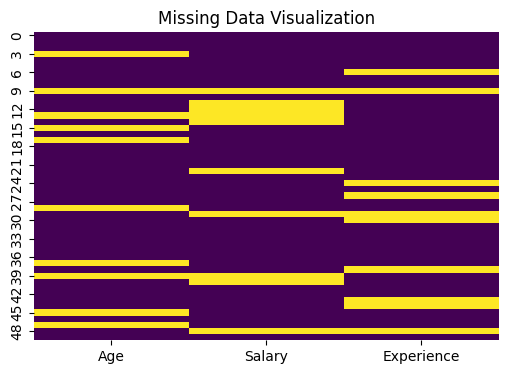

In [3]:
plt.figure(figsize=(6, 4))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Visualization")
plt.show()

In [4]:
mean_imputer = SimpleImputer(strategy='mean')
data_mean = pd.DataFrame(mean_imputer.fit_transform(data), columns=data.columns)

# Median Imputation
median_imputer = SimpleImputer(strategy='median')
data_median = pd.DataFrame(median_imputer.fit_transform(data), columns=data.columns)

# Most Frequent Imputation
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode = pd.DataFrame(mode_imputer.fit_transform(data), columns=data.columns)

# Compare
print("\nMean Imputation:\n", data_mean.head(5))
print("\nMedian Imputation:\n", data_median.head(5))
print("\nMode Imputation:\n", data_mode.head(5))


Mean Imputation:
       Age    Salary  Experience
0  56.000   65920.0         1.0
1  46.000   97121.0         5.0
2  32.000   99479.0        10.0
3  37.775  119475.0         7.0
4  38.000   49457.0         9.0

Median Imputation:
     Age    Salary  Experience
0  56.0   65920.0         1.0
1  46.0   97121.0         5.0
2  32.0   99479.0        10.0
3  38.0  119475.0         7.0
4  38.0   49457.0         9.0

Mode Imputation:
     Age    Salary  Experience
0  56.0   65920.0         1.0
1  46.0   97121.0         5.0
2  32.0   99479.0        10.0
3  19.0  119475.0         7.0
4  38.0   49457.0         9.0


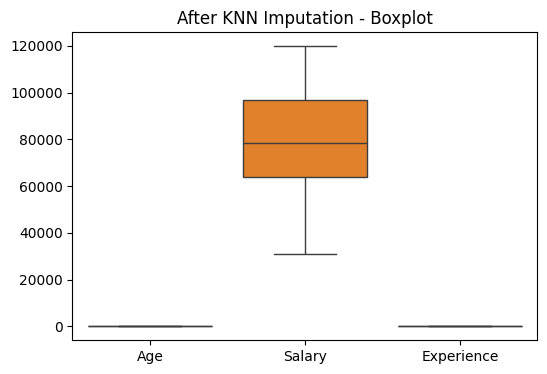

In [6]:
knn_imputer = KNNImputer(n_neighbors=3)
data_knn = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

plt.figure(figsize=(6, 4))
sns.boxplot(data=data_knn)
plt.title("After KNN Imputation - Boxplot")
plt.show()



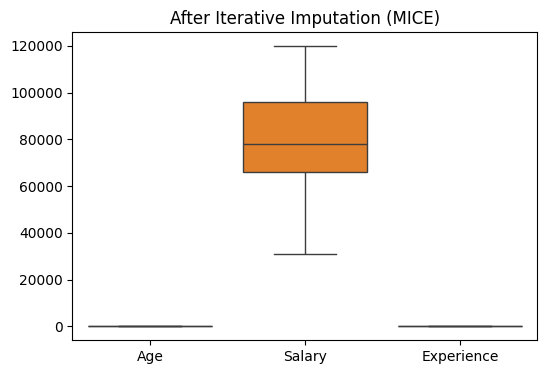

In [7]:
iter_imputer = IterativeImputer(random_state=42)
data_iter = pd.DataFrame(iter_imputer.fit_transform(data), columns=data.columns)

plt.figure(figsize=(6, 4))
sns.boxplot(data=data_iter)
plt.title("After Iterative Imputation (MICE)")
plt.show()

In [8]:
data_iter["Target"] = data_iter["Salary"] * 0.001 + data_iter["Experience"] * 0.2 + np.random.normal(0, 1, 50)

X = data_iter.drop("Target", axis=1)
y = data_iter["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nModel R² Score after Imputation:", r2_score(y_test, y_pred))


Model R² Score after Imputation: 0.9993060667966848
